In [170]:
## ProKabaddi Hackathon - Code begins
## Importing Libraries
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import re
import seaborn as sns
import os
from scipy.stats import poisson,skellam


from sklearn.preprocessing import Imputer
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [171]:
## Importing Data which has been scrapped from webpages
TD = pd.read_csv('TD.csv',encoding='utf-8')  # for Team Data
PD = pd.read_csv('PD.csv',encoding='utf-8')  # Player Data
TP = pd.read_csv('TP.csv',encoding='utf-8')  # Player List Team wise

In [172]:
TD.head()

,TeamName,MatchesPlayed,Rank,TotalPointsScored,TotalPointsConceded,AverageScorePoints,SuccessfulRaids,RaidPoints,AverageRaidPoints,AverageTacklePoints,DODRaidPoints,SuperRaids,SuperTackles,Successfultackles,TacklePoints,AllOutsConceded,AllOutsInflicted,Unnamed: 17
0,Bengal Warriors,18,1,636,620,30.70,299,374,20.78,11.72,70,15,31,189,211,27,29,NaN
1,Bengaluru Bulls,17,2,582,609,30.55,278,351,20.65,11.28,64,12,25,173,203,26,26,NaN
2,Puneri Paltan,18,3,578,572,30.00,276,329,20.56,10.59,64,11,22,167,180,21,26,NaN
3,Dabang Delhi K.C.,16,4,567,559,29.81,254,314,19.50,10.53,63,7,22,166,179,21,24,NaN
4,Patna Pirates,17,4,567,559,29.00,250,313,18.47,10.50,60,7,21,160,176,21,22,NaN


In [173]:
TD = TD.drop(TD.columns[17],axis=1)
TD.head()

,TeamName,MatchesPlayed,Rank,TotalPointsScored,TotalPointsConceded,AverageScorePoints,SuccessfulRaids,RaidPoints,AverageRaidPoints,AverageTacklePoints,DODRaidPoints,SuperRaids,SuperTackles,Successfultackles,TacklePoints,AllOutsConceded,AllOutsInflicted
0,Bengal Warriors,18,1,636,620,30.70,299,374,20.78,11.72,70,15,31,189,211,27,29
1,Bengaluru Bulls,17,2,582,609,30.55,278,351,20.65,11.28,64,12,25,173,203,26,26
2,Puneri Paltan,18,3,578,572,30.00,276,329,20.56,10.59,64,11,22,167,180,21,26
3,Dabang Delhi K.C.,16,4,567,559,29.81,254,314,19.50,10.53,63,7,22,166,179,21,24
4,Patna Pirates,17,4,567,559,29.00,250,313,18.47,10.50,60,7,21,160,176,21,22


In [174]:
TP.head()

,PlayerName,TeamName
0,Maninder Singh,Bengal Warriors
1,K. Prapanjan,Bengal Warriors
2,Mohammad Taghi,Bengal Warriors
3,Rakesh Narwal,Bengal Warriors
4,Ravindra Ramesh,Bengal Warriors


In [175]:
PD.head()

,Unnamed: 0,Name,Position,Born,Team,Height,Nationality,Weight,Match Played,Points,...,Super Raids,Super 10s,Tackles,Successful Tackles,Unsuccessful Tackles,Successful Tackles Per Match,Tackle Bonus Points,Tackle Success Rate,Super Tackles,High 5s
0,0,Maninder Singh,Raider,"Jan 1, 1990",Bengal Warriors,6 ft,India,76 kg,19,192,...,6,9,7,0,7,0.00,0,0.00,0,0
1,1,K. Prapanjan,Raider,"May 29, 1993",Bengal Warriors,6 ft 1 in,India,83.6 kg,18,101,...,4,3,14,2,12,0.11,0,14.28,0,0
2,2,Mohammad Taghi,Raider,"Oct 21, 1991",Bengal Warriors,-,Iran,-,3,1,...,0,0,4,1,3,0.33,0,25.00,0,0
3,3,Rakesh Narwal,Raider,"May 6, 1995",Bengal Warriors,6 ft 1 in,India,82 kg,1,3,...,0,0,0,0,0,0.00,0,0.00,0,0
4,4,Ravindra Ramesh,Raider,"Apr 16, 1996",Bengal Warriors,-,India,-,2,2,...,0,0,1,1,0,0.50,0,100.00,0,0


In [176]:
PD = PD.drop(PD.columns[0],axis=1)
PD.head()

,Name,Position,Born,Team,Height,Nationality,Weight,Match Played,Points,Career Best Points,...,Super Raids,Super 10s,Tackles,Successful Tackles,Unsuccessful Tackles,Successful Tackles Per Match,Tackle Bonus Points,Tackle Success Rate,Super Tackles,High 5s
0,Maninder Singh,Raider,"Jan 1, 1990",Bengal Warriors,6 ft,India,76 kg,19,192,19,...,6,9,7,0,7,0.00,0,0.00,0,0
1,K. Prapanjan,Raider,"May 29, 1993",Bengal Warriors,6 ft 1 in,India,83.6 kg,18,101,12,...,4,3,14,2,12,0.11,0,14.28,0,0
2,Mohammad Taghi,Raider,"Oct 21, 1991",Bengal Warriors,-,Iran,-,3,1,1,...,0,0,4,1,3,0.33,0,25.00,0,0
3,Rakesh Narwal,Raider,"May 6, 1995",Bengal Warriors,6 ft 1 in,India,82 kg,1,3,3,...,0,0,0,0,0,0.00,0,0.00,0,0
4,Ravindra Ramesh,Raider,"Apr 16, 1996",Bengal Warriors,-,India,-,2,2,2,...,0,0,1,1,0,0.50,0,100.00,0,0


In [177]:
PD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 29 columns):
Name                            221 non-null object
Position                        221 non-null object
Born                            221 non-null object
Team                            221 non-null object
Height                          221 non-null object
Nationality                     221 non-null object
Weight                          221 non-null object
Match Played                    221 non-null int64
Points                          221 non-null int64
Career Best Points              221 non-null int64
Not Out Percentage              221 non-null float64
Raids                           221 non-null int64
Successful Raids                221 non-null int64
Unsuccessful Raids              221 non-null int64
Empty Raid                      221 non-null int64
Successful Raid Percentage      221 non-null float64
Raid Touch Points               221 non-null int64
Raid Bonus Points

In [178]:
TP.isnull().sum(axis=0)

PlayerName    43
TeamName       0
dtype: int64

In [179]:
TP=TP[~TP.PlayerName.isnull()]
TP.isnull().sum(axis=0)

PlayerName    0
TeamName      0
dtype: int64

In [180]:
TD.isnull().sum(axis=0)

TeamName               0
MatchesPlayed          0
Rank                   0
TotalPointsScored      0
TotalPointsConceded    0
AverageScorePoints     0
SuccessfulRaids        0
RaidPoints             0
AverageRaidPoints      0
AverageTacklePoints    0
DODRaidPoints          0
SuperRaids             0
SuperTackles           0
Successfultackles      0
TacklePoints           0
AllOutsConceded        0
AllOutsInflicted       0
dtype: int64

In [181]:
PD=PD[~PD.Name.isnull()]

In [182]:
PD.isnull().sum(axis=0)

Name                            0
Position                        0
Born                            0
Team                            0
Height                          0
Nationality                     0
Weight                          0
Match Played                    0
Points                          0
Career Best Points              0
Not Out Percentage              0
Raids                           0
Successful Raids                0
Unsuccessful Raids              0
Empty Raid                      0
Successful Raid Percentage      0
Raid Touch Points               0
Raid Bonus Points               0
Total Raid Points               0
Super Raids                     0
Super 10s                       0
Tackles                         0
Successful Tackles              0
Unsuccessful Tackles            0
Successful Tackles Per Match    0
Tackle Bonus Points             0
Tackle Success Rate             0
Super Tackles                   0
High 5s                         0
dtype: int64

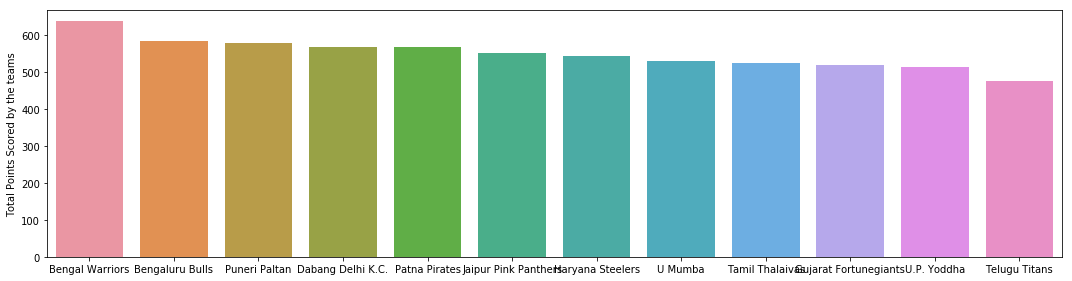

In [183]:
## Plotting to see the Top Ranked team
plt.figure(figsize=(40,10))
plt.subplot(2, 2, 1)
diag=sns.barplot(x=TD['TeamName'].values, y=TD['TotalPointsScored'].values)
diag.set_ylabel('Total Points Scored by the teams')
plt.show()

In [184]:
## So, Top rank team is Bengal Warriors

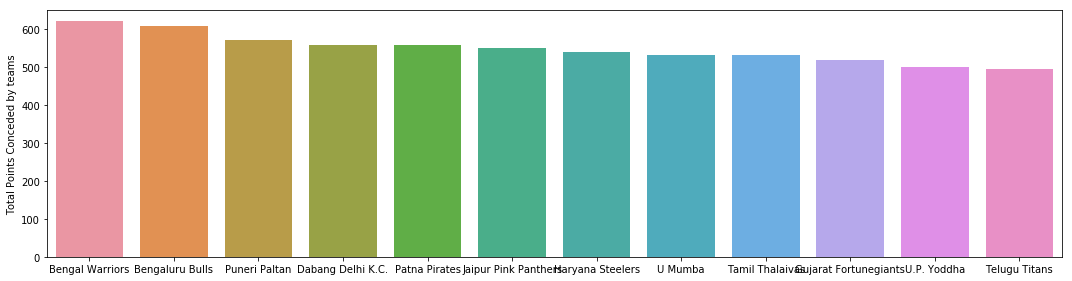

In [185]:
plt.figure(figsize=(40,10))
plt.subplot(2, 2, 1)
diag=sns.barplot(x=TD['TeamName'].values, y=TD['TotalPointsConceded'].values)
diag.set_ylabel('Total Points Conceded by teams')
plt.show()

In [186]:
## Again Bengal Warriors are the one conceding highest points


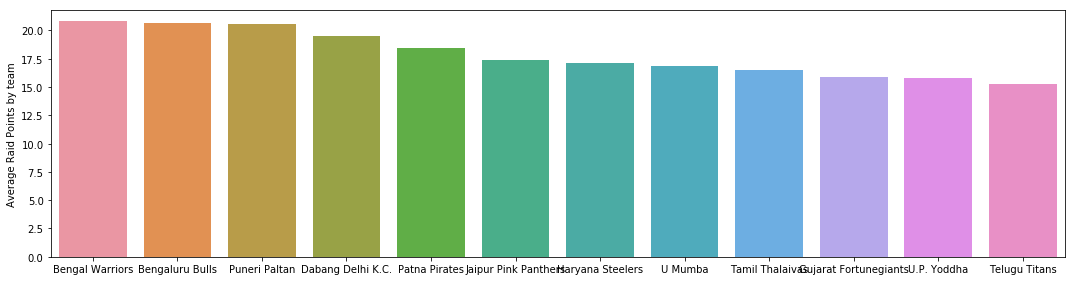

In [187]:
plt.figure(figsize=(40,10))
plt.subplot(2, 2, 1)
diag=sns.barplot(x=TD['TeamName'].values, y=TD['AverageRaidPoints'].values)
diag.set_ylabel('Average Raid Points by team')
plt.show()

In [188]:
## Again Bengal Warriors are the one's with highest average raid points

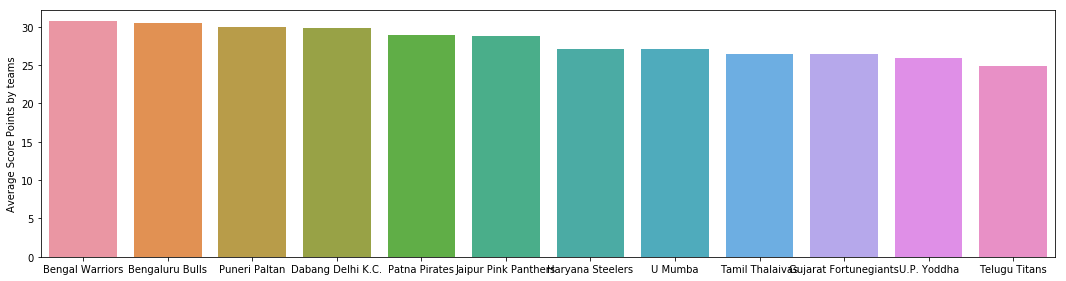

In [189]:
plt.figure(figsize=(40,10))
plt.subplot(2, 2, 1)
diag=sns.barplot(x=TD['TeamName'].values, y=TD['AverageScorePoints'].values)
diag.set_ylabel('Average Score Points by teams')
plt.show()

In [190]:
## Again Bengal Warriors are the one's with highest score points
## Task 2 - Bengal Warriors will win the table 
## Top 4 teams will be :

# Bengal Warriors
# Dabang Delhi
# Bengaluru Bulls
# Puneri Paltan



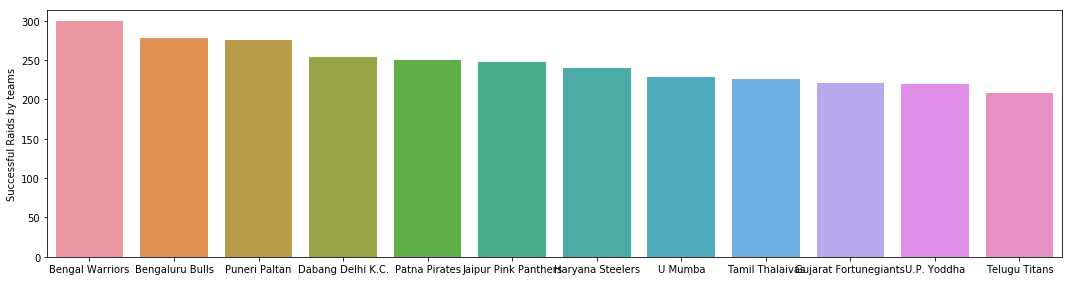

In [191]:
plt.figure(figsize=(40,10))
plt.subplot(2, 2, 1)
diag=sns.barplot(x=TD['TeamName'].values, y=TD['SuccessfulRaids'].values)
diag.set_ylabel('Successful Raids by teams')
plt.show()

In [192]:
## Task 3 
## Bengal Warriors are the one's with highest successful raids

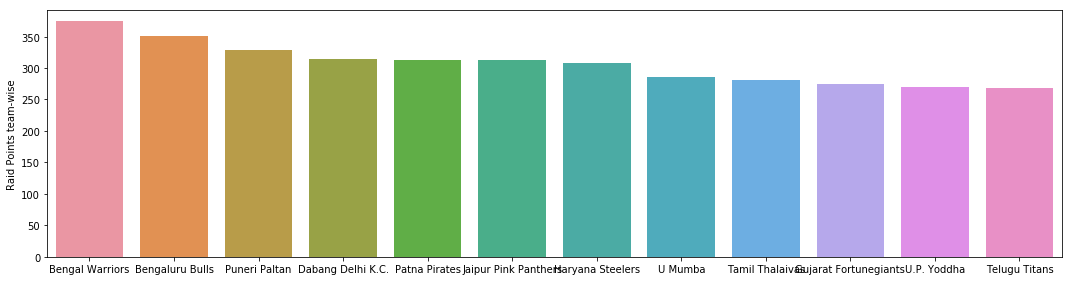

In [193]:
plt.figure(figsize=(40,10))
plt.subplot(2, 2, 1)
diag=sns.barplot(x=TD['TeamName'].values, y=TD['RaidPoints'].values)
diag.set_ylabel('Raid Points team-wise')
plt.show()

In [194]:
## Task 3
## Bengal Warriors are the one's with highest raid points

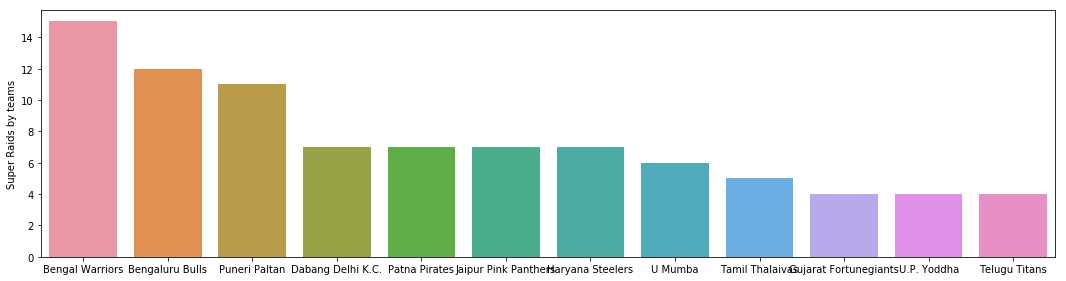

In [195]:
plt.figure(figsize=(40,10))
plt.subplot(2, 2, 1)
diag=sns.barplot(x=TD['TeamName'].values, y=TD['SuperRaids'].values)
diag.set_ylabel('Super Raids by teams')
plt.show()

In [196]:
## Bengal Warriors are the one's with highest Super raids

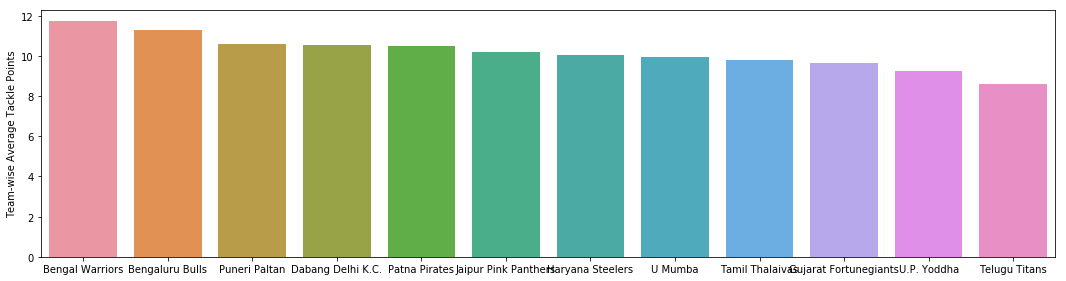

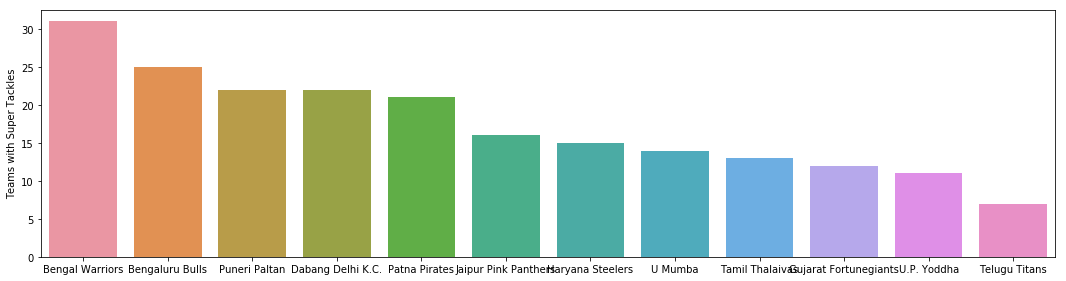

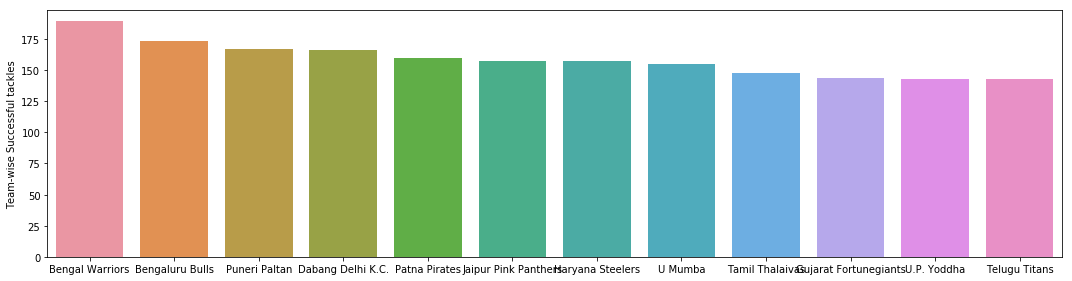

In [197]:
plt.figure(figsize=(40,10))
plt.subplot(2, 2, 1)
diag=sns.barplot(x=TD['TeamName'].values, y=TD['AverageTacklePoints'].values)
diag.set_ylabel('Team-wise Average Tackle Points')
plt.show()

plt.figure(figsize=(40,10))
plt.subplot(2, 2, 1)
c=sns.barplot(x=TD['TeamName'].values, y=TD['SuperTackles'].values)
c.set_ylabel('Teams with Super Tackles')
plt.show()

plt.figure(figsize=(40,10))
plt.subplot(2, 2, 1)
d=sns.barplot(x=TD['TeamName'].values, y=TD['Successfultackles'].values)
d.set_ylabel('Team-wise Successful tackles')
plt.show()

In [198]:
## Bengal Warriors Again on Top
## Task 4
## Bengal Warriors will be the one with highest successful tackles

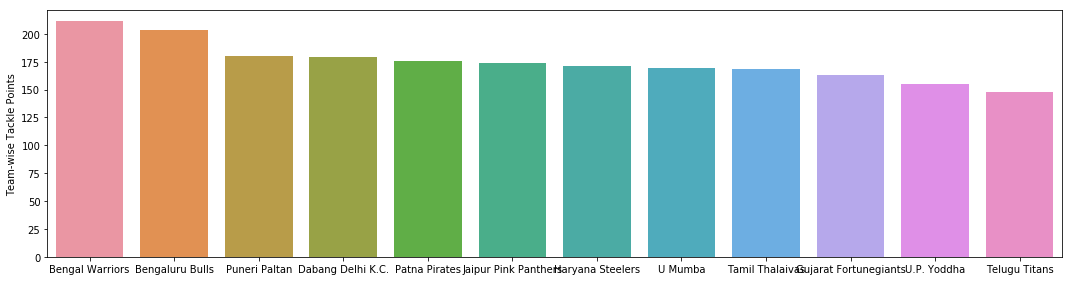

In [199]:
plt.figure(figsize=(40,10))
plt.subplot(2, 2, 1)
diag=sns.barplot(x=TD['TeamName'].values, y=TD['TacklePoints'].values)
diag.set_ylabel('Team-wise Tackle Points')
plt.show()

In [200]:
## Bengal Warriors Again on Top
## Task 5 - SPT -
## S.P.T. = Total number of super-raids in the tournament + total number of super-tackles in the tournament 
## + total number of all-outs inflicted in the tournament - total number of all-outs conceded in the tournament

## As Bengal Warriors are the leaders in all front so they will be the one with highest SPT

In [201]:
#Correlation 
TCorr = TD[['TotalPointsScored','TotalPointsConceded', 'AverageScorePoints', 'SuccessfulRaids','RaidPoints', 'AverageRaidPoints', 'AverageTacklePoints','DODRaidPoints', 'SuperRaids', 'SuperTackles', 'Successfultackles', 'TacklePoints', 'AllOutsConceded', 'AllOutsInflicted']].corr()


In [202]:
TCorr

,TotalPointsScored,TotalPointsConceded,AverageScorePoints,SuccessfulRaids,RaidPoints,AverageRaidPoints,AverageTacklePoints,DODRaidPoints,SuperRaids,SuperTackles,Successfultackles,TacklePoints,AllOutsConceded,AllOutsInflicted
TotalPointsScored,1.000000,0.950393,0.934902,0.968115,0.951444,0.916581,0.976135,0.927080,0.918195,0.982149,0.956329,0.944822,0.941888,0.964891
TotalPointsConceded,0.950393,1.000000,0.940201,0.970273,0.978734,0.940500,0.981149,0.936285,0.951371,0.967024,0.961232,0.988523,0.972847,0.951733
AverageScorePoints,0.934902,0.940201,1.000000,0.951785,0.925003,0.967375,0.942698,0.943854,0.870369,0.954427,0.913640,0.901805,0.906934,0.972111
SuccessfulRaids,0.968115,0.970273,0.951785,1.000000,0.983066,0.964421,0.954072,0.921528,0.972936,0.971442,0.968503,0.947181,0.917003,0.958932
RaidPoints,0.951444,0.978734,0.925003,0.983066,1.000000,0.930184,0.951519,0.903684,0.974690,0.959244,0.978546,0.963887,0.921582,0.922205
AverageRaidPoints,0.916581,0.940500,0.967375,0.964421,0.930184,1.000000,0.922425,0.942076,0.916532,0.955705,0.931362,0.901054,0.882108,0.958552
AverageTacklePoints,0.976135,0.981149,0.942698,0.954072,0.951519,0.922425,1.000000,0.940725,0.911018,0.975953,0.947032,0.980126,0.989488,0.971256
DODRaidPoints,0.927080,0.936285,0.943854,0.921528,0.903684,0.942076,0.940725,1.000000,0.858713,0.941247,0.920399,0.897938,0.913861,0.959366
SuperRaids,0.918195,0.951371,0.870369,0.972936,0.974690,0.916532,0.911018,0.858713,1.000000,0.925423,0.963482,0.940950,0.881954,0.885552
SuperTackles,0.982149,0.967024,0.954427,0.971442,0.959244,0.955705,0.975953,0.941247,0.925423,1.000000,0.970457,0.956404,0.942464,0.968519


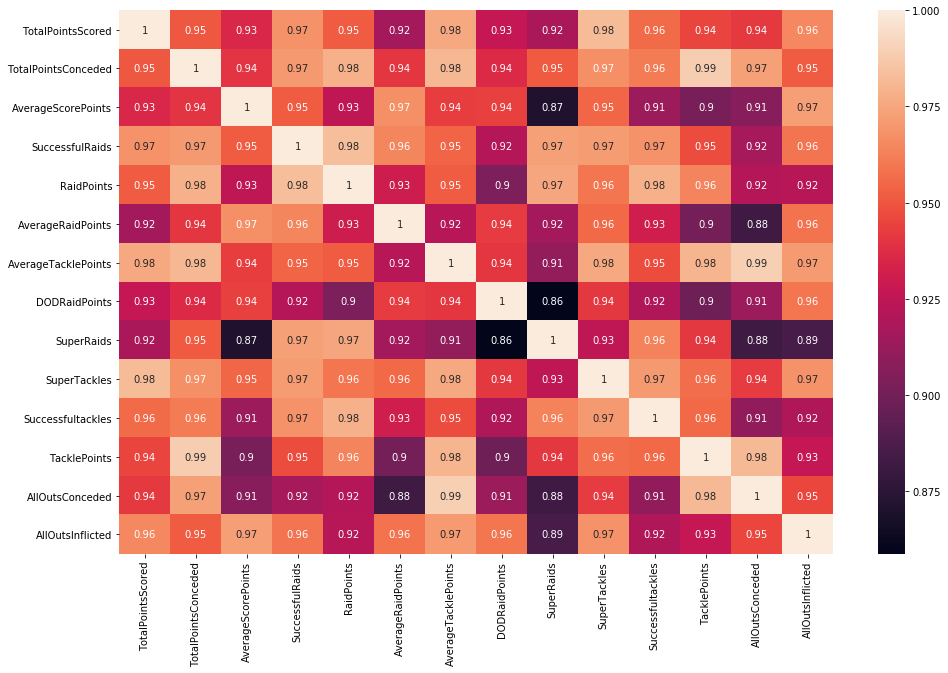

In [203]:
## Heatmap to judge the correlation between different variables
plt.subplots(figsize=(16, 10))
sns.heatmap(TCorr, 
            xticklabels=TCorr.columns.values,
            yticklabels=TCorr.columns.values,annot= True)
plt.show()

In [204]:
## Logistic Model - Building Model

from sklearn.model_selection import train_test_split
# Putting feature variable to X
X = TD.drop(['TeamName','Rank'],axis=1)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 15 columns):
MatchesPlayed          12 non-null int64
TotalPointsScored      12 non-null int64
TotalPointsConceded    12 non-null int64
AverageScorePoints     12 non-null float64
SuccessfulRaids        12 non-null int64
RaidPoints             12 non-null int64
AverageRaidPoints      12 non-null float64
AverageTacklePoints    12 non-null float64
DODRaidPoints          12 non-null int64
SuperRaids             12 non-null int64
SuperTackles           12 non-null int64
Successfultackles      12 non-null int64
TacklePoints           12 non-null int64
AllOutsConceded        12 non-null int64
AllOutsInflicted       12 non-null int64
dtypes: float64(3), int64(12)
memory usage: 1.4 KB


In [205]:
# Putting response variable to y
y = TD['Rank']

y.head()

0    1
1    2
2    3
3    4
4    4
Name: Rank, dtype: int64

In [206]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [207]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

vars_num=['TotalPointsScored','TotalPointsConceded', 'AverageScorePoints', 'SuccessfulRaids','RaidPoints', 'AverageRaidPoints', 'AverageTacklePoints','DODRaidPoints', 'SuperRaids', 'SuperTackles', 'Successfultackles', 'TacklePoints', 'AllOutsConceded', 'AllOutsInflicted']
X_train[vars_num] = scaler.fit_transform(X_train[vars_num])

X_train

,MatchesPlayed,TotalPointsScored,TotalPointsConceded,AverageScorePoints,SuccessfulRaids,RaidPoints,AverageRaidPoints,AverageTacklePoints,DODRaidPoints,SuperRaids,SuperTackles,Successfultackles,TacklePoints,AllOutsConceded,AllOutsInflicted
4,17,0.397262,0.341820,0.500047,0.173058,0.254298,0.245047,0.434598,0.517960,-0.105085,0.465864,0.078031,0.154715,0.388623,0.373267
2,18,0.636707,0.680385,0.998847,1.072960,0.732978,1.284942,0.536193,0.842955,1.015826,0.603897,0.563558,0.379755,0.388623,1.001928
0,18,1.899237,1.930470,1.348007,1.869027,2.079264,1.394405,1.811767,1.330446,2.136737,1.846200,2.089499,2.123813,1.823538,1.473423
10,17,-0.756430,-1.220786,-0.996353,-0.899902,-1.032153,-1.073480,-0.976435,-1.513256,-0.945769,-0.914473,-1.101105,-1.026744,-1.046292,-1.041219
7,17,-0.429913,-0.361353,-0.467625,-0.588397,-0.553473,-0.546069,-0.197545,-0.213278,-0.385313,-0.500372,-0.268774,-0.239105,-0.089682,-0.412559
3,16,0.397262,0.341820,0.904075,0.311504,0.284216,0.757531,0.468463,0.761706,-0.105085,0.603897,0.494197,0.323495,0.388623,0.687598
11,16,-1.627140,-1.351003,-1.525081,-1.280630,-1.062070,-1.342161,-1.698885,-1.513256,-0.945769,-1.466608,-1.101105,-1.420564,-1.763750,-1.669880
8,18,-0.516984,-0.361353,-0.761917,-0.657621,-0.703060,-0.720214,-0.378157,-0.213278,-0.665541,-0.638406,-0.754301,-0.295365,-0.089682,-0.412559


In [208]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
# Logistic regression model
logm1 = sm.GLM(y_train.astype(float),(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   Rank   No. Observations:                    8
Model:                            GLM   Df Residuals:                        0
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 02 Oct 2019   Deviance:                          nan
Time:                        19:02:13   Pearson chi2:                 1.60e+18
No. Iterations:                   100   Covariance Type:             nonrobust
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.073e+16   2.03e+07   1.02e+09      0.000    2.07e+16    2.07e+16
MatchesPlayed        1.428e+17   1.79e+06   7.98e+10      0.000    1.43e+17    1.43e+17
TotalPointsScored   -2.931e+17   5.77e+07  -5.08e+09      0.000   -2.93e+17   -2.93e+17
TotalPointsConceded -4.104e+17   8.19e+07  -5.01e+09      0.000    -4.1e+17    -4.1e+17
AverageScorePoints  -7.855e+17   1.16e+08  -6.78e+09      0.000   -7.85e+17   -7.85e+17
SuccessfulRaids      1.419e+17   8.57e+07   1.66e+09      0.000    1.42e+17    1.42e+17
RaidPoints          -4.338e+17   1.02e+08  -4.26e+09      0.000   -4.34e+17   -4.34e+17
AverageRaidPoints    3.509e+17   1.03e+08    3.4e+09      0.000    3.51e+17    3.51e+17
AverageTacklePoints -8.345e+17   1.62e+08  -5.14e+09      0.000   -8.35e+17   -8.35e+17
DODRaidPoints       -7.932e+17   8.65e+07  -9.17e+09      0.000   -7.93e+17   -7.93e+17
SuperRaids          -5.819e+17   1.51e+08  -3.85e+09      0.000   -5.82e+17   -5.82e+17
SuperTackles        -2.216e+17    7.6e+07  -2.91e+09      0.000   -2.22e+17   -2.22e+17
Successfultackles    4.456e+17   1.19e+08   3.74e+09      0.000    4.46e+17    4.46e+17
TacklePoints         1.303e+18   2.03e+08   6.42e+09      0.000     1.3e+18     1.3e+18
AllOutsConceded     -4.332e+16    5.1e+07   -8.5e+08      0.000   -4.33e+16   -4.33e+16
AllOutsInflicted     3.831e+17   1.12e+08   3.41e+09      0.000    3.83e+17    3.83e+17
=======================================================================================
"""

In [209]:
# Feature Selection using RFE
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 12)            
rfe = rfe.fit(X_train, y_train)

In [210]:
rfe.support_

array([False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [211]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MatchesPlayed', False, 3),
 ('TotalPointsScored', False, 2),
 ('TotalPointsConceded', False, 4),
 ('AverageScorePoints', True, 1),
 ('SuccessfulRaids', True, 1),
 ('RaidPoints', True, 1),
 ('AverageRaidPoints', True, 1),
 ('AverageTacklePoints', True, 1),
 ('DODRaidPoints', True, 1),
 ('SuperRaids', True, 1),
 ('SuperTackles', True, 1),
 ('Successfultackles', True, 1),
 ('TacklePoints', True, 1),
 ('AllOutsConceded', True, 1),
 ('AllOutsInflicted', True, 1)]

In [212]:
col = X_train.columns[rfe.support_]

In [213]:
X_train.columns[~rfe.support_]

Index(['MatchesPlayed', 'TotalPointsScored', 'TotalPointsConceded'], dtype='object')

In [214]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   Rank   No. Observations:                    8
Model:                            GLM   Df Residuals:                        0
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 02 Oct 2019   Deviance:                          nan
Time:                        19:02:13   Pearson chi2:                 1.60e+18
No. Iterations:                   100   Covariance Type:             nonrobust
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.466e+18   2.37e+07   1.04e+11      0.000    2.47e+18    2.47e+18
AverageScorePoints  -9.208e+17   1.26e+08  -7.32e+09      0.000   -9.21e+17   -9.21e+17
SuccessfulRaids      1.903e+17   8.99e+07   2.12e+09      0.000     1.9e+17     1.9e+17
RaidPoints          -6.529e+17   1.34e+08  -4.88e+09      0.000   -6.53e+17   -6.53e+17
AverageRaidPoints    4.024e+17   1.09e+08   3.69e+09      0.000    4.02e+17    4.02e+17
AverageTacklePoints  -8.98e+17   1.73e+08  -5.19e+09      0.000   -8.98e+17   -8.98e+17
DODRaidPoints       -8.803e+17   1.15e+08  -7.68e+09      0.000    -8.8e+17    -8.8e+17
SuperRaids          -4.719e+17    1.5e+08  -3.16e+09      0.000   -4.72e+17   -4.72e+17
SuperTackles        -4.526e+17   9.11e+07  -4.97e+09      0.000   -4.53e+17   -4.53e+17
Successfultackles    2.537e+17   1.34e+08   1.89e+09      0.000    2.54e+17    2.54e+17
TacklePoints         1.263e+18   2.02e+08   6.26e+09      0.000    1.26e+18    1.26e+18
AllOutsConceded     -2.291e+16   5.13e+07  -4.46e+08      0.000   -2.29e+16   -2.29e+16
AllOutsInflicted     4.701e+17    1.1e+08   4.26e+09      0.000     4.7e+17     4.7e+17
=======================================================================================
"""

In [215]:
## Task 6 
import pandas as pd
playerdf=pd.read_csv('PD.csv')
playerdf=playerdf.drop(['Successful Raid Percentage'],axis=1)
playerdf['Successful Raid Percentage']=(playerdf['Successful Raids']/playerdf['Raids'])*100
playerdf.sort_values(['Successful Raid Percentage'],ascending=0)[['Name','Raids', 'Successful Raids', 'Unsuccessful Raids',
       'Empty Raid', 'Successful Raid Percentage']].head()

,Name,Raids,Successful Raids,Unsuccessful Raids,Empty Raid,Successful Raid Percentage
89,Chand Singh,1,1,0,0,100.000000
32,Saurabh Nandal,1,1,0,0,100.000000
203,Ankush,6,4,2,0,66.666667
23,Pawan Kumar,343,187,89,69,54.518950
0,Maninder Singh,306,161,55,90,52.614379


In [216]:
PD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221 entries, 0 to 220
Data columns (total 29 columns):
Name                            221 non-null object
Position                        221 non-null object
Born                            221 non-null object
Team                            221 non-null object
Height                          221 non-null object
Nationality                     221 non-null object
Weight                          221 non-null object
Match Played                    221 non-null int64
Points                          221 non-null int64
Career Best Points              221 non-null int64
Not Out Percentage              221 non-null float64
Raids                           221 non-null int64
Successful Raids                221 non-null int64
Unsuccessful Raids              221 non-null int64
Empty Raid                      221 non-null int64
Successful Raid Percentage      221 non-null float64
Raid Touch Points               221 non-null int64
Raid Bonus Points

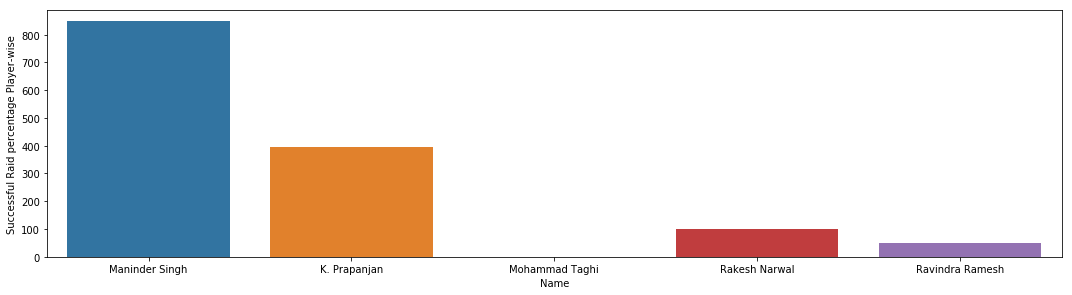

In [217]:
## Task 6 
plt.figure(figsize=(40,10))
plt.subplot(2, 2, 1)

diag=sns.barplot(x=PD['Name'].iloc[:5], y=((PD['Successful Raids'].values/PD['Match Played'].values)*100))
diag.set_ylabel('Successful Raid percentage Player-wise')
plt.show()

In [218]:
## Maninder Singh will be the one with highest Successful raid percentage 
## As can be seen Chand Singh has 100% but considering he has only one raid so far so apart from him, it will be Maninder
## Singh with highest successful raid percentage

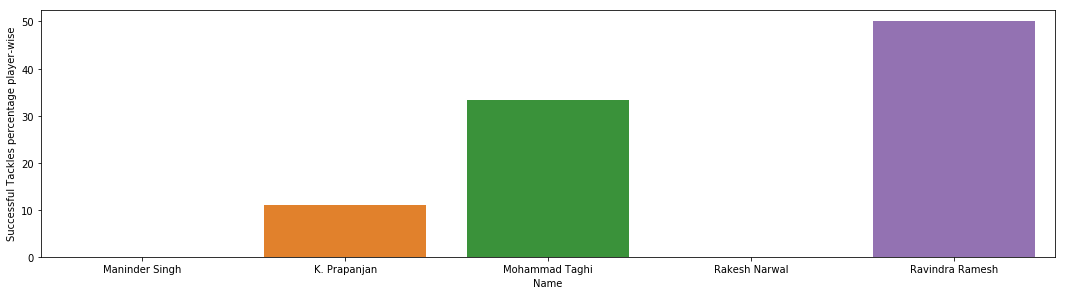

In [219]:
## TAsk 7
plt.figure(figsize=(40,10))
plt.subplot(2, 2, 1)

a=sns.barplot(x=PD['Name'].iloc[:5], y=((PD['Successful Tackles'].values/PD['Match Played'].values)*100))
a.set_ylabel('Successful Tackles percentage player-wise')
plt.show()

In [220]:
## Task 7 
playerdf['Successful Tackle Percentage']=(playerdf['Successful Tackles']/playerdf['Tackles'])*100
playerdf.sort_values(['Successful Tackle Percentage'],ascending=0)[['Name','Tackles', 'Successful Tackles', 'Unsuccessful Tackles',
       'Tackle Bonus Points', 'Tackle Success Rate', 'Successful Tackle Percentage']].head()



,Name,Tackles,Successful Tackles,Unsuccessful Tackles,Tackle Bonus Points,Tackle Success Rate,Successful Tackle Percentage
4,Ravindra Ramesh,1,1,0,0,100.00,100.000000
60,Lalit Chaudhary,2,2,0,0,150.00,100.000000
203,Ankush,1,1,0,0,100.00,100.000000
63,Sonu Jaglan,4,3,1,0,100.00,75.000000
217,Gurdeep,3,2,1,0,66.66,66.666667


In [221]:
## As can be Seen Ravindra Ramesh is being present in both the ways so he will be the player with successful tackles.
## Also, noted down Lalit Chaudhary and Ankush have all 100% along side Ravindra